In [13]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


In [14]:
os.chdir('F:\TopMentor_DataScience\Batch 103 Day 33')
print(os.getcwd())

F:\TopMentor_DataScience\Batch 103 Day 33


In [15]:
df1=pd.read_csv('Position Salary.csv')  # reading data from csv to dataframe 'df1'

In [16]:
df1

,Position,Level,Salary
0,Busienss Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,120000
4,Country Manager,5,140000
5,Region Manager,6,130000
6,Partnor,7,100000
7,Senior Partnor,8,90000
8,C Level,9,95000
9,CEO,10,85000


In [17]:
 #using iloc , getting df1 values into dependent and independent variables, x -> independent, y is dependent
x=df1.iloc[:,1:2].values 
print ('x values are',x)
y=df1.iloc[:,2:].values
print ('y values are',y)

x values are [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
y values are [[ 45000]
 [ 50000]
 [ 60000]
 [120000]
 [140000]
 [130000]
 [100000]
 [ 90000]
 [ 95000]
 [ 85000]]


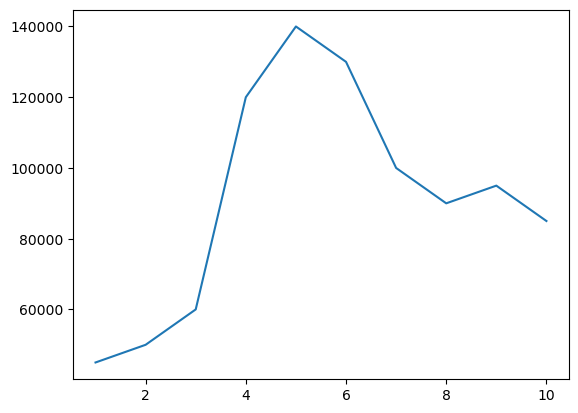

In [18]:
plt.plot(x,y)

In [19]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr

LinearRegression()

In [20]:
lr.fit(x,y)
y_lr=lr.predict(x)
print('Predicted y values are',y_lr)

Predicted y values are [[ 70909.09090909]
 [ 75484.84848485]
 [ 80060.60606061]
 [ 84636.36363636]
 [ 89212.12121212]
 [ 93787.87878788]
 [ 98363.63636364]
 [102939.39393939]
 [107515.15151515]
 [112090.90909091]]


In [21]:
#x=df1.iloc[:,1:2].values
#print ('x values are',x)

In [22]:
#df1

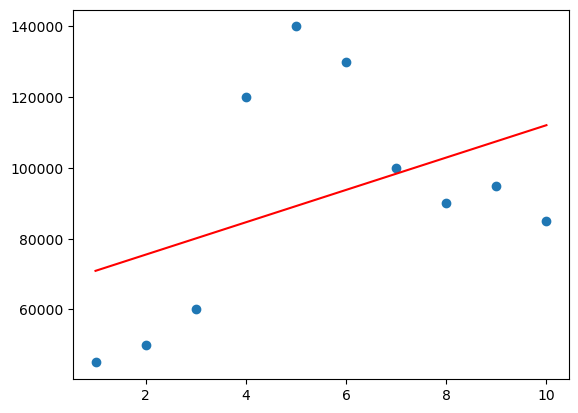

In [23]:
plt.plot(x,y_lr,'r')
plt.scatter(x,y)

In [24]:
lr_result=pd.concat([df1,pd.DataFrame(y_lr,columns=['Predeicted salary'])],axis=1)
y_lr
lr_result['difference']=lr_result['Salary']-lr_result['Predeicted salary']
lr_result

,Position,Level,Salary,Predeicted salary,difference
0,Busienss Analyst,1,45000,70909.090909,-25909.090909
1,Junior Consultant,2,50000,75484.848485,-25484.848485
2,Senior Consultant,3,60000,80060.606061,-20060.606061
3,Manager,4,120000,84636.363636,35363.636364
4,Country Manager,5,140000,89212.121212,50787.878788
5,Region Manager,6,130000,93787.878788,36212.121212
6,Partnor,7,100000,98363.636364,1636.363636
7,Senior Partnor,8,90000,102939.393939,-12939.393939
8,C Level,9,95000,107515.151515,-12515.151515
9,CEO,10,85000,112090.909091,-27090.909091


In [25]:
from sklearn.metrics import r2_score

In [26]:
accuracy_lr=r2_score(y,y_lr)
accuracy_lr

0.17895348198378502

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
DT=DecisionTreeRegressor()
DT

DecisionTreeRegressor()

In [29]:
DT.fit(x,y)

DecisionTreeRegressor()

In [30]:
y_dt=DT.predict(x)
y_dt

array([ 45000.,  50000.,  60000., 120000., 140000., 130000., 100000.,
        90000.,  95000.,  85000.])

In [31]:
lr_result_DT=pd.concat([df1,pd.DataFrame(y_dt,columns=['Predeicted salary'])],axis=1)
y_lr
lr_result_DT['difference']=lr_result_DT['Salary']-lr_result_DT['Predeicted salary']
lr_result_DT
print('r2_score(y,y_dt) is ---->  ', r2_score(y,y_dt))

r2_score(y,y_dt) is ---->   1.0


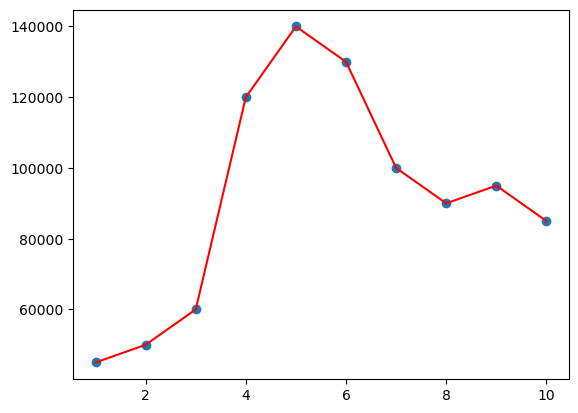

In [32]:
plt.plot(x,y_dt,'r')
plt.scatter(x,y)
plt.show()

C:\Users\SUDHARSHAN\AppData\Local\Temp\ipykernel_8272\2154387347.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid=np.arange(min(x),max(x),0.1)


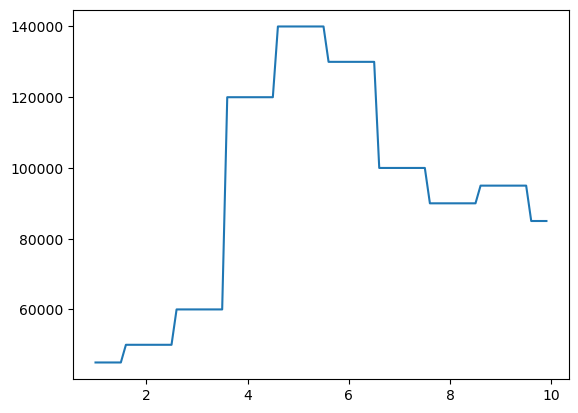

In [33]:
x_grid=np.arange(min(x),max(x),0.1)
x_grid=x_grid.reshape(len(x_grid),1)
x_grid.shape
y_grid=DT.predict(x_grid)
y_grid
plt.plot(x_grid,y_grid)
plt.show()

r2_score(y,y_dt) is ---->   0.0


C:\Users\SUDHARSHAN\AppData\Local\Temp\ipykernel_8272\3460056094.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid=np.arange(min(x),max(x),0.1)


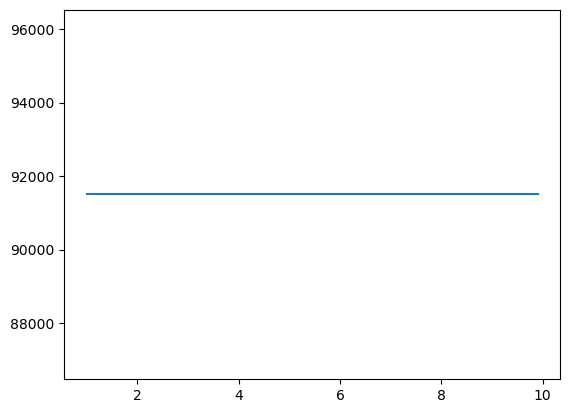

In [37]:
DT=DecisionTreeRegressor(min_samples_split=15)
DT
DT.fit(x,y)
y_dt=DT.predict(x)
y_dt
lr_result_DT=pd.concat([df1,pd.DataFrame(y_dt,columns=['Predeicted salary'])],axis=1)
y_lr
lr_result_DT['difference']=lr_result_DT['Salary']-lr_result_DT['Predeicted salary']
lr_result_DT
print('r2_score(y,y_dt) is ---->  ', r2_score(y,y_dt))
x_grid=np.arange(min(x),max(x),0.1)
x_grid=x_grid.reshape(len(x_grid),1)
x_grid.shape
y_grid=DT.predict(x_grid)
y_grid
plt.plot(x_grid,y_grid)
plt.show()

In [42]:
from sklearn.tree import plot_tree
#tree.plot_tree([x,y])

In [47]:
#plot_tree(DT, feature_name=['Level'])


path=DT.cost_complexity_pruning_path (x,y)
print ('path is ',path)
path.ccp_alphas

path is  {'ccp_alphas': array([0.]), 'impurities': array([9.6525e+08])}


array([0.])

In [48]:
ccp_alphas, impurities=path.ccp_alphas,path.impurities

In [50]:
ccp_alphas

array([0.])